# LAB | Imbalanced

**Load the data**

In this challenge, we will be working with Credit Card Fraud dataset.

https://raw.githubusercontent.com/data-bootcamp-v4/data/main/card_transdata.csv

Metadata

- **distance_from_home:** the distance from home where the transaction happened.
- **distance_from_last_transaction:** the distance from last transaction happened.
- **ratio_to_median_purchase_price:** Ratio of purchased price transaction to median purchase price.
- **repeat_retailer:** Is the transaction happened from same retailer.
- **used_chip:** Is the transaction through chip (credit card).
- **used_pin_number:** Is the transaction happened by using PIN number.
- **online_order:** Is the transaction an online order.
- **fraud:** Is the transaction fraudulent. **0=legit** -  **1=fraud**


In [ ]:
#Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.utils import resample
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [3]:
fraud = pd.read_csv("https://raw.githubusercontent.com/data-bootcamp-v4/data/main/card_transdata.csv")
fraud.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


**Steps:**

- **1.** What is the distribution of our target variable? Can we say we're dealing with an imbalanced dataset?
- **2.** Train a LogisticRegression.
- **3.** Evaluate your model. Take in consideration class importance, and evaluate it by selection the correct metric.
- **4.** Run **Oversample** in order to balance our target variable and repeat the steps above, now with balanced data. Does it improve the performance of our model? 
- **5.** Now, run **Undersample** in order to balance our target variable and repeat the steps above (1-3), now with balanced data. Does it improve the performance of our model?
- **6.** Finally, run **SMOTE** in order to balance our target variable and repeat the steps above (1-3), now with balanced data. Does it improve the performance of our model? 

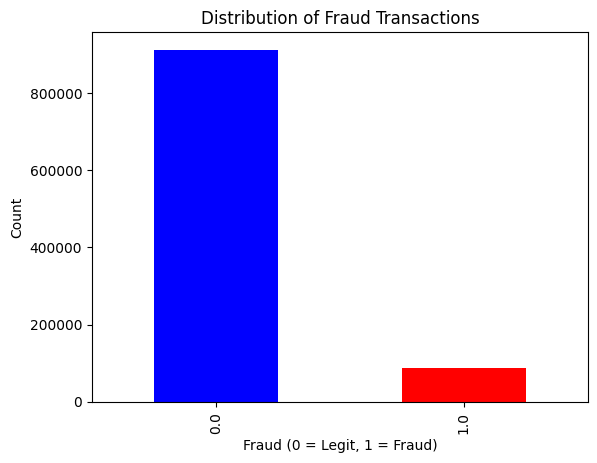

In [4]:
# 1
# Check the distribution of the target variable
fraud['fraud'].value_counts()

# Plot the distribution of the target variable
fraud['fraud'].value_counts().plot(kind='bar', color=['blue', 'red'])
plt.title('Distribution of Fraud Transactions')
plt.xlabel('Fraud (0 = Legit, 1 = Fraud)')
plt.ylabel('Count')
plt.show()


In [5]:
# 2

# Select features (X) and target (y)
X = fraud.drop(columns=['fraud'])
y = fraud['fraud']

# Split data into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Logistic Regression model
model = LogisticRegression(class_weight='balanced', random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model using classification report and confusion matrix
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.99      0.93      0.96    182557
         1.0       0.58      0.95      0.72     17443

    accuracy                           0.94    200000
   macro avg       0.79      0.94      0.84    200000
weighted avg       0.96      0.94      0.94    200000

[[170484  12073]
 [   917  16526]]


c:\Users\cdeniaca\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [8]:
# 3 

# Supongamos que el modelo ha sido entrenado y lo guardamos en una variable llamada `model`
# Vamos a predecir sobre los datos de prueba
y_pred = model.predict(X_test)

# Evaluar el rendimiento del modelo
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nMatriz de Confusión:\n", confusion_matrix(y_test, y_pred))
print("\nReporte de Clasificación:\n", classification_report(y_test, y_pred))


Accuracy: 0.93505

Matriz de Confusión:
 [[170484  12073]
 [   917  16526]]

Reporte de Clasificación:
               precision    recall  f1-score   support

         0.0       0.99      0.93      0.96    182557
         1.0       0.58      0.95      0.72     17443

    accuracy                           0.94    200000
   macro avg       0.79      0.94      0.84    200000
weighted avg       0.96      0.94      0.94    200000



In [6]:
# 4

# Oversample using SMOTE
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Train a Logistic Regression model on the balanced data
model_res = LogisticRegression(class_weight='balanced', random_state=42)
model_res.fit(X_train_res, y_train_res)

# Make predictions
y_pred_res = model_res.predict(X_test)

# Evaluate the model using classification report and confusion matrix
print("Oversampled (SMOTE) Performance:")
print(classification_report(y_test, y_pred_res))
print(confusion_matrix(y_test, y_pred_res))




Oversampled (SMOTE) Performance:
              precision    recall  f1-score   support

         0.0       1.00      0.93      0.96    182557
         1.0       0.57      0.95      0.71     17443

    accuracy                           0.93    200000
   macro avg       0.78      0.94      0.84    200000
weighted avg       0.96      0.93      0.94    200000

[[169824  12733]
 [   849  16594]]


c:\Users\cdeniaca\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [7]:
# 5

# Combine the original data back into a dataframe
fraud_data = pd.concat([X_train, y_train], axis=1)

# Separate the minority and majority class
fraud_class = fraud_data[fraud_data['fraud'] == 1]
legit_class = fraud_data[fraud_data['fraud'] == 0]

# Undersample the majority class (legit transactions)
legit_class_undersampled = resample(legit_class, 
                                   replace=False, 
                                   n_samples=len(fraud_class), 
                                   random_state=42)

# Combine the minority class and the undersampled majority class
fraud_undersampled = pd.concat([fraud_class, legit_class_undersampled])

# Split back into X and y
X_train_undersampled = fraud_undersampled.drop(columns=['fraud'])
y_train_undersampled = fraud_undersampled['fraud']

# Train a Logistic Regression model on the undersampled data
model_undersampled = LogisticRegression(class_weight='balanced', random_state=42)
model_undersampled.fit(X_train_undersampled, y_train_undersampled)

# Make predictions
y_pred_undersampled = model_undersampled.predict(X_test)

# Evaluate the model using classification report and confusion matrix
print("Undersampled Performance:")
print(classification_report(y_test, y_pred_undersampled))
print(confusion_matrix(y_test, y_pred_undersampled))


Undersampled Performance:
              precision    recall  f1-score   support

         0.0       0.99      0.93      0.96    182557
         1.0       0.57      0.95      0.72     17443

    accuracy                           0.93    200000
   macro avg       0.78      0.94      0.84    200000
weighted avg       0.96      0.93      0.94    200000

[[170214  12343]
 [   861  16582]]


c:\Users\cdeniaca\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [9]:
# 6


# Usamos SMOTE para balancear el conjunto de entrenamiento
smote = SMOTE(sampling_strategy='minority', random_state=42)
X_res, y_res = smote.fit_resample(X_train, y_train)

# Re-entrenamos el modelo con los datos balanceados
model_smote = LogisticRegression(max_iter=1000, class_weight='balanced')
model_smote.fit(X_res, y_res)

# Evaluamos el rendimiento con SMOTE
y_pred_smote = model_smote.predict(X_test)
print("\nEvaluación con SMOTE:")
print("Accuracy:", accuracy_score(y_test, y_pred_smote))
print("\nMatriz de Confusión (SMOTE):\n", confusion_matrix(y_test, y_pred_smote))
print("\nReporte de Clasificación (SMOTE):\n", classification_report(y_test, y_pred_smote))



Evaluación con SMOTE:
Accuracy: 0.93509

Matriz de Confusión (SMOTE):
 [[170447  12110]
 [   872  16571]]

Reporte de Clasificación (SMOTE):
               precision    recall  f1-score   support

         0.0       0.99      0.93      0.96    182557
         1.0       0.58      0.95      0.72     17443

    accuracy                           0.94    200000
   macro avg       0.79      0.94      0.84    200000
weighted avg       0.96      0.94      0.94    200000

